In [1]:
#!wget https://zenodo.org/records/15613160/files/Mg8.vasp
#!wget https://zenodo.org/records/15613160/files/Mg8_rho_ks.xsf
#!wget https://zenodo.org/records/15613160/files/Mg8_rho_lmgp.xsf
!wget https://zenodo.org/records/15613160/files/Mg8.tddft.out

--2025-06-07 21:58:47--  https://zenodo.org/records/15613160/files/Mg8.tddft.out
Resolving zenodo.org (zenodo.org)... 188.185.45.92, 188.185.43.25, 188.185.48.194
Connecting to zenodo.org (zenodo.org)|188.185.45.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4462810 (4.3M) [application/octet-stream]
Saving to: ‘Mg8.tddft.out’

Mg8.tddft.out       100%[===================>]   4.26M   331KB/s    in 14s     

2025-06-07 21:59:03 (311 KB/s) - ‘Mg8.tddft.out’ saved [4462810/4462810]



In [4]:
from ase.visualize import view
from ase.visualize.plot import plot_atoms
from io import BytesIO
from ase.io import read
import numpy as np
import matplotlib.pyplot as plt

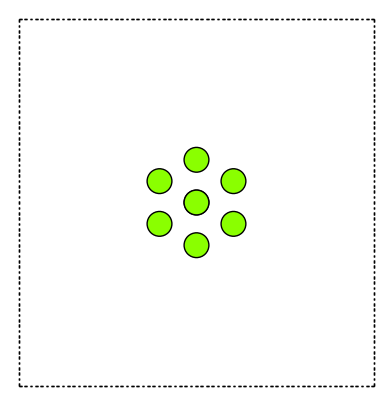

In [5]:
atoms = read('Mg8.vasp')
fig, ax = plt.subplots(figsize=(5, 5))
plot_atoms(atoms, ax, radii=0.5, rotation=('0x,00y,0z'))
plt.axis('off')
buf = BytesIO()
plt.savefig(buf, format='png', bbox_inches='tight')
buf.seek(0)
fig.savefig('Mg8.png')

## Compare electron density from KS and LMGP

In [6]:
from dftpy.formats import io
rho_ks = io.read_density('Mg8_rho_ks.xsf', full=True)
rho_lmgp = io.read_density('Mg8_rho_lmgp.xsf', full=True)

In [7]:
rho_ks.grid.nr, rho_lmgp.grid.nr

(array([160, 160, 150]), array([36, 36, 32]))

In [8]:
from dftpy.grid import DirectGrid
from dftpy.utils import grid_map_data
grid = DirectGrid(rho_lmgp.grid.lattice, nr=rho_lmgp.grid.nr)
rho_ks = grid_map_data(rho_ks, grid=grid)

#### Electron density difference

In [9]:
0.5 * (np.abs(rho_ks-rho_lmgp)).integral()

1.9737541304852015

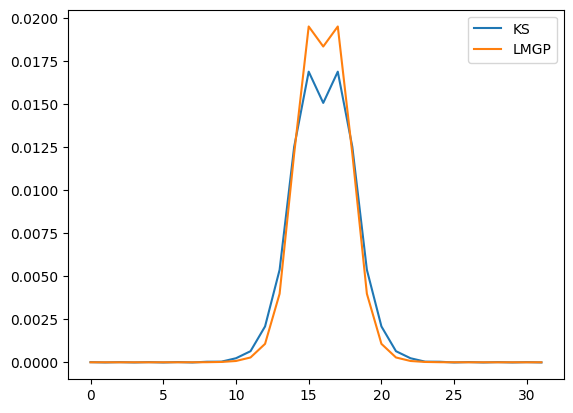

In [10]:
plt.plot(rho_ks[15,15,:].ravel(), label='KS')
plt.plot(rho_lmgp[15,15,:].ravel(), label='LMGP')
plt.legend()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from dftpy.td.utils import calc_spectra_mu
#import qepy
from dftpy.constants import TIME_CONV, LEN_CONV, ENERGY_CONV
as2au = TIME_CONV['s']['au']*1e-18
bohr = LEN_CONV['Angstrom']['Bohr']
ha = ENERGY_CONV['Hartree']['eV']

In [32]:
direction = 0 # 0, 1, 2 means x, y, z-direction, respectively
k = 0.0053 # kick_strength in a.u.
interval = 1.0 * as2au
output = 'Mg8.tddft.out'

In [33]:
mu = []
with open(output, 'r') as fh:
    for line in fh:
        if line[:4]=='DIP ':
            mu.append(list(map(float, line.split()[-3:])))
mu = np.asarray(mu)

Text(0, 0.5, 'Dipole Moment (au)')

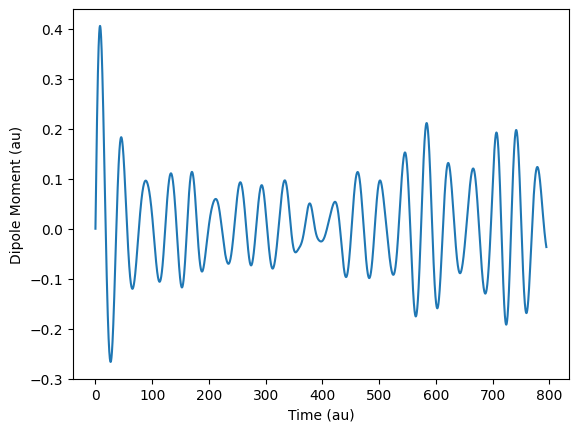

In [34]:
max_steps = len(mu)-1
t = np.linspace(0, interval * max_steps, max_steps + 1)
delta_mu = mu[:,0] - mu[0,0]
plt.plot(t, delta_mu)
plt.xlabel('Time (au)')
plt.ylabel('Dipole Moment (au)')

In [35]:
max_steps, 0.02*(as2au**2)

(19226, 3.418218299967324e-05)

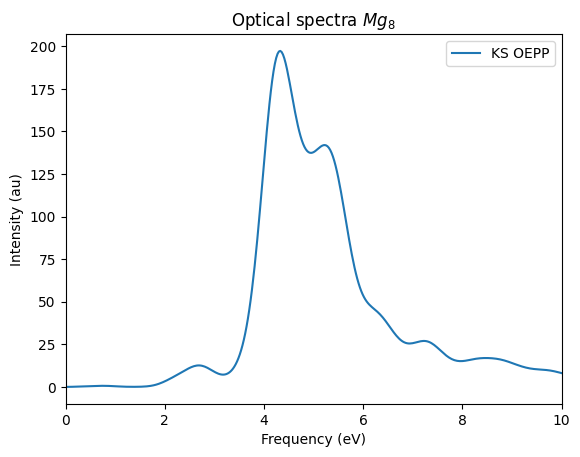

In [36]:
sigma = 0.03*(as2au**2)
omega, spectra = calc_spectra_mu(delta_mu, interval, kick=k, emax=2, sigma=sigma)
plt.plot(omega*ha, spectra, '-', label='KS OEPP')
plt.xlabel('Frequency (eV)')
plt.ylabel('Intensity (au)')
plt.xlim(0, 10)
plt.title(r'Optical spectra $Mg_{8}$')
plt.legend()

In [37]:
import numpy as np

In [38]:
np.savetxt(fname='Mg8_KS_spectrum.txt',X=np.array([omega*ha, spectra]))

In [31]:
bla = np.loadtxt(fname='Mg8_KS_spectrum.txt')

In [14]:
np.shape(bla)

(2, 75992)

In [15]:
bla[1]

array([-0.00000000e+00,  8.52771358e-04,  3.37811728e-03,  7.47972995e-03,
        1.30054937e-02,  1.97592053e-02,  2.75153262e-02,  3.60353233e-02,
        4.50840203e-02,  5.44444063e-02,  6.39295403e-02,  7.33905078e-02,
        8.27198134e-02,  9.18500663e-02,  1.00748298e-01,  1.09406689e-01,
        1.17830820e-01,  1.26026804e-01,  1.33988717e-01,  1.41687724e-01,
        1.49064054e-01,  1.56022735e-01,  1.62433553e-01,  1.68135351e-01,
        1.72944290e-01,  1.76665396e-01,  1.79106350e-01,  1.80092334e-01,
        1.79480621e-01,  1.77173662e-01,  1.73129537e-01,  1.67368908e-01,
        1.59977891e-01,  1.51106595e-01,  1.40963472e-01,  1.29805882e-01,
        1.17927609e-01,  1.05644244e-01,  9.32774869e-02,  8.11394899e-02,
        6.95182958e-02,  5.86653650e-02,  4.87860004e-02,  4.00332896e-02,
        3.25059544e-02,  2.62502626e-02,  2.12659163e-02,  1.75156099e-02,
        1.49377433e-02,  1.34615964e-02,  1.30241206e-02,  1.35873855e-02,
        1.51556427e-02,  